# Capstone 1 EDA

## Step 1) Read the Manual

Before we progress further, we display the information about the dataset that we obtained from the dataset manual, that is, from Kaggle and the UCI Machine Learning Repository.

From Kaggle, an overview of the variables:

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) default.payment.next.month: Default payment (1=yes, 0=no)

And from UCI:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Potential issue: We'll want to group values 5 and 6 for Education into one value (looking at the Kaggle description) since they both stand for "unknown". And perhaps we'll want to include 4 in that grouping since it has the value of "others".

We can compare our examination of the variables to the above list to determine if our variables or the manual or both are wrong.

## Step 2) Review the Data Types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random

In [2]:
filename = 'UCI_Credit_Card.csv'

In [3]:
data = pd.read_csv(filename, index_col=0)

In [4]:
pd.set_option('display.max_columns', 500)
data.sample(5).transpose()

ID,14947,8220,24683,22930,4407
LIMIT_BAL,70000.0,50000.0,330000.0,80000.0,20000.0
SEX,2.0,1.0,1.0,2.0,1.0
EDUCATION,2.0,2.0,1.0,1.0,2.0
MARRIAGE,1.0,2.0,2.0,2.0,2.0
AGE,31.0,51.0,42.0,32.0,39.0
PAY_0,0.0,0.0,0.0,-1.0,0.0
PAY_2,0.0,0.0,0.0,-1.0,0.0
PAY_3,0.0,0.0,0.0,-1.0,0.0
PAY_4,0.0,2.0,0.0,-1.0,0.0
PAY_5,0.0,2.0,0.0,-1.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

All columns in this dataset have a numeric type. They are either float-valued (continuous) or int-valued (discrete). Nothing seems to be off, so we may continue.

In [6]:
display(data.shape)

(30000, 24)

In [7]:
data.head().transpose()

ID,1,2,3,4,5
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0
PAY_5,-2.0,0.0,0.0,0.0,0.0


## Step 3) Print Sample Rows

We print a random slice of rows "to preserve the row order in case the data happens to be sorted or has other inter-row structure." (https://www.kaggle.com/sohier/structured-eda-for-data-cleaning-results/)

In [8]:
pd.options.display.float_format = '{:,}'.format #display long numbers with commas

In [9]:
random.seed(42)
data[random.randint(0, len(data)):].head().transpose() # transpose it so we can see the values

ID,20953,20954,20955,20956,20957
LIMIT_BAL,"10,000.0","140,000.0","50,000.0","270,000.0","290,000.0"
SEX,1.0,1.0,1.0,1.0,1.0
EDUCATION,3.0,2.0,2.0,2.0,2.0
MARRIAGE,2.0,2.0,2.0,1.0,2.0
AGE,37.0,41.0,36.0,44.0,30.0
PAY_0,0.0,0.0,-1.0,2.0,0.0
PAY_2,0.0,0.0,-1.0,0.0,0.0
PAY_3,0.0,0.0,-1.0,0.0,0.0
PAY_4,0.0,0.0,-1.0,0.0,0.0
PAY_5,0.0,0.0,-1.0,0.0,0.0


Potential Issue: There are 0s in the PAY_X (for X in (1,2,3,4,5,6)) columns, so the manual's explanation of that column can't be correct.

## Step 4) Summary Statistics

This stage allows us to do a basic sanity check about the distribution of the data:

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,"30,000.0","167,484.32266666667","129,747.66156719506","10,000.0","50,000.0","140,000.0","240,000.0","1,000,000.0"
SEX,"30,000.0",1.6037333333333332,0.4891291960904071,1.0,1.0,2.0,2.0,2.0
EDUCATION,"30,000.0",1.8531333333333333,0.7903486597208212,0.0,1.0,2.0,2.0,6.0
MARRIAGE,"30,000.0",1.5518666666666667,0.5219696006131538,0.0,1.0,2.0,2.0,3.0
AGE,"30,000.0",35.4855,9.217904068090183,21.0,28.0,34.0,41.0,79.0
PAY_0,"30,000.0",-0.0167,1.1238015279973212,-2.0,-1.0,0.0,0.0,8.0
PAY_2,"30,000.0",-0.13376666666666667,1.19718597303439,-2.0,-1.0,0.0,0.0,8.0
PAY_3,"30,000.0",-0.1662,1.1968675684467378,-2.0,-1.0,0.0,0.0,8.0
PAY_4,"30,000.0",-0.22066666666666668,1.1691386224022984,-2.0,-1.0,0.0,0.0,8.0
PAY_5,"30,000.0",-0.2662,1.1331874060026166,-2.0,-1.0,0.0,0.0,8.0


Insights:
* The means for the pay columns are increasing with time. That is, the mean of PAY_0 is greater than the mean of PAY_2 is greater than the mean of PAY_3... This indicates fewer payments being made on time with time. The standard deviation of them is also increasing with time, indicating the variability of repayment statuses is increasing.
* The mean bill statements rise with time, as well as the bill standard deviations. This means the bill statements are increasing and their variability is also increasing.
* The mean amount of previous payments (the PAY_AMT columns) increases, after decreasing initially from April to May (PAY_AMT6 to PAY_AMT5).

Potential Issues:
* The names PAY_0 and default.payment.next.month are problematic, PAY_0 because it should by PAY_1 and default.payment.next.month because it can be shorter
* There are no values of 9.0 for the PAY columns as the manual says there should be. Also there are values of -2 and 0 for all of them when the manual says there shouldn't be. Maybe all the values are shifted by one?

* Marriage has values of 0, which shouldn't be possible given our dataset description.
* Education has values of 0, which shouldn't be possible given our dataset description.
* We can have negative values for the BILL_AMT columns? Does this mean that we pre-paid our credit?

### Fixing the Issues (Data Cleaning):

#### Problem 1: Get rid of Bad Column Names

In [11]:
## Rename columns
data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

#### Problem 2: Replace Negative Values with 0 in Pay_X columns

To deal with with values for the PAY_X columns, a sensible solution is to convert all non-positive values to 0. The dataset description says that a value of -1 means "pay duly" and positive values represent a payment delay by that number of months. Therefore, converting -1 and -2 values to 0, and having 0 represent "pay duly" is logical.

In [12]:
for i in range(1,7):
    data.loc[data["PAY_" + str(i)] < 0, "PAY_" + str(i)] = 0

#### Problem 3: Get rid of Values of 0 for Marriage

A logical move is to group the 0 values with the "Other" values, coded as 3, so that is what we'll do:

In [13]:
data.loc[data["MARRIAGE"] == 0, 'MARRIAGE'] = 3

"Other" for marriage can possibly refer to divorced, widowed, seperated, etc.

#### Problem 4: Get rid of 0 Values for Education

Currently coded as:
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

We see that 0 is not even in the dataset desciption, and we have 2 values for unknown. So a logical move is to convert the 0, 5 and 6 values to 4, which is what we'll do. "Other" can  refer to education less than high school or perhaps vocational training.

In [14]:
replace = (data["EDUCATION"] == 0) | (data["EDUCATION"] == 5) | (data["EDUCATION"] == 6) 
data.loc[replace,'EDUCATION'] = 4

#### Problem 5: Negative Values in BILL_AMT Columns

It's possible for these values to represent people who choose to pre-pay their cards early, so this doesn't have to be an error.

## Step 5) Plotting

In this section, we plot both basic histograms, and relationships between columns.

In [15]:
%matplotlib inline
import seaborn as sns

In [16]:
pd.set_option('display.max_rows', 500)
c = data.corr()
s = c.unstack()
so = s.sort_values()
so.shape

(576,)

There is too much information to process at a glance. So we must look at each variable(column) individually. 

In looking at the variables, we will do a few things. We will produce summary statistics, a histogram, and a box plot of the variables values to see the distribution of a variable's values on its own; and we will look for correlations between a variable and other variables that are noteable. We will make the arbitrary but useful distinction of only examining relationships where the correlation's magnitude is greater than 0.1 or less than -0.1 (or equal to those values).

Functions to help us plot/display information without having to repeat code:

In [17]:
def get_info(var, bins=10, rwidth=0.5):
    data[var].hist(bins=bins, rwidth=rwidth, density=True)
    data[[var]].plot(kind='box')
    print(data[var].describe())
    
def corr_2_cols(Col1, Col2):
    res = data.groupby([Col1, Col2]).size().unstack()
    res['percentage'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    res['percentage'] = pd.Series(["{0:.1f}%".format(val * 100) for val in res['percentage']], index=res.index)
    return res

def relationship_with_default(column):
    res = data.groupby([column, 'default']).size().unstack()
    res.rename(columns={0:"No Default", 1:"Default"}, inplace=True)
    res['percentage default'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    res['percentage default'] = pd.Series(["{0:.1f}%".format(val * 100) for val in res['percentage default']], index=res.index)
    return res

def check_significant_correlation(var):
    c = data.corr()[var]
    so = c.sort_values()
    new = so[abs(so) > 0.1]
    print(new)

### Categorical Variables

#### SEX

SEX: Gender (1=male, 2=female)

count             30,000.0
mean    1.6037333333333332
std     0.4891291960904071
min                    1.0
25%                    1.0
50%                    2.0
75%                    2.0
max                    2.0
Name: SEX, dtype: float64


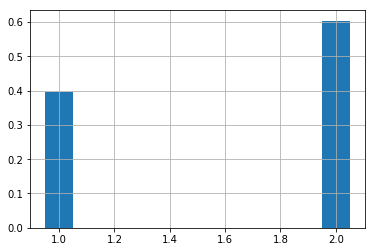

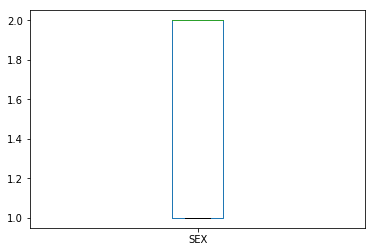

In [18]:
get_info('SEX', bins=[0.5,1.5,2.5],rwidth=0.1)

Most of the records in this dataset are for females (about 60%)

In [19]:
check_significant_correlation('SEX')

SEX   1.0
Name: SEX, dtype: float64


Sex does not have a correlation with any other factor that is greater than 0.1 or less than -0.1. So there is little to consider.

In [20]:
data.corr()['SEX']['default']

-0.03996057770542914

In [21]:
sex_and_default = relationship_with_default('SEX')
sex_and_default.rename(index = {1:"Male", 2:"Female"}, inplace=True)
sex_and_default

default,No Default,Default,percentage default
SEX,,,
Male,9015,2873,24.2%
Female,14349,3763,20.8%


In [22]:
def plot_graph(table):
    ax = table.plot(kind='bar', stacked=True)
    #ax.set_xticklabels(table.xlabels,rotation=0)
    plt.xticks(rotation='horizontal')
    ax.legend(["No Default", "Default"])
    plt.ylabel('Counts')
    plt.show()

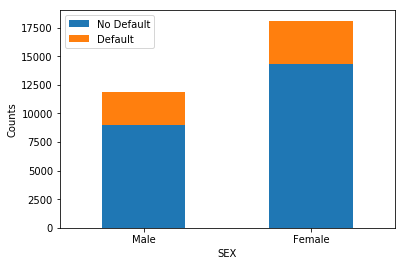

In [23]:
plot_graph(sex_and_default)

So it seems to be the case that Sex is significantly correlated with nothing (other than itself, which is trivial). Sex is weakly correlated with default, meaning higher values (meaning female) have a slight correlation with lower values of default (i.e. no default). As we can see by making a table of sex against default, males have a slighty greater than 3% chance of defaulting.

#### Education

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

count             30,000.0
mean    1.8422666666666667
std     0.7444944624525737
min                    1.0
25%                    1.0
50%                    2.0
75%                    2.0
max                    4.0
Name: EDUCATION, dtype: float64


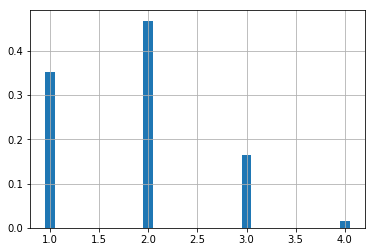

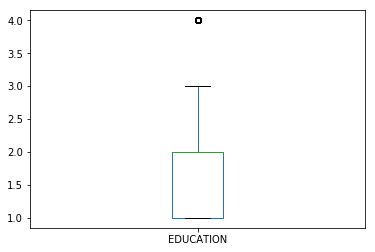

In [24]:
get_info('EDUCATION', bins=[0.5,1.5,2.5,3.5,4.5], rwidth=0.1)

The vast majority of people in this dataset have either graduate school (1) or a university education (2). We can see that about 80% of the values are 1 or 2 which stand for graduate school and university, respecitvely. Another 15% or value 3 has a high school diploma, and the remainer has less than that or other types of education.

In [25]:
check_significant_correlation('EDUCATION')

LIMIT_BAL   -0.23108753519666203
MARRIAGE     -0.1367969413360245
AGE          0.18243429685768472
EDUCATION                    1.0
Name: EDUCATION, dtype: float64


Education seems to be correlated with a few other variables. Let's take each in turn:

* The negative correlation between Education and LIMIT_BAL makes sense. It says that with less education (a higher EDUCATION code), we would expect LIMIT_BAL to be lower (i.e. the amount of given credit to be lower). Since education generally involves taking on credit to pay for it, it makes sense for education to be correlated with higher credit, especially because education is something that credit organizations like to extend credit for.
* The 2nd correlation says that Education is negatively correlated with Marriage, meaning, given the coding of this dataset, that education is not correlated with marriage. This means that more educated people should be less likely to be married because as we incease our education values (i.e. have less education), we should see smaller marriage values (i.e. more marriage).
* The last correlation says that Education is negatively correlated with Age, meaning that the individuals with more education in this dataset tend to have younger ages. This is a somewhat curious result, as it runs counter to intuition since we would expect individuals with more education to be older since it takes time for them to get that education. This could be because it takes individuals with less education longer to obtain a credit card in the first place. 

We now check out the relationship between Education and a few other variables informally.

*Education and Default*

In [26]:
education_and_default = relationship_with_default('EDUCATION')
education_and_default.rename(index = {1:"Grad School", 2:"University", 3:"High School", 4:"Other"}, inplace=True)
education_and_default

default,No Default,Default,percentage default
EDUCATION,,,
Grad School,8549,2036,19.2%
University,10700,3330,23.7%
High School,3680,1237,25.2%
Other,435,33,7.1%


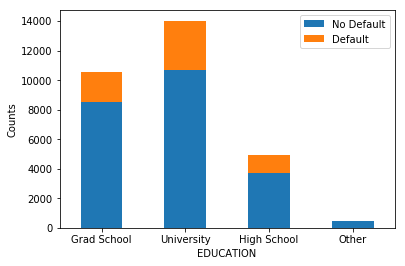

In [27]:
plot_graph(education_and_default)

More education (decreasing value) tends to result in a decreasing percentage of defaults, with the exception of falling under "Other". Perhaps the "Other" class is what causes the correlation to be small.

*Education and Credit (LIMIT_BAL)*

In [28]:
var = data[['EDUCATION', 'LIMIT_BAL']].groupby('EDUCATION').agg({'mean', 'std'})
var.round(0)

LIMIT_BAL          
                std      mean
EDUCATION                    
1         135,475.0 212,956.0
2         120,672.0 147,062.0
3         113,979.0 126,550.0
4         118,386.0 181,316.0

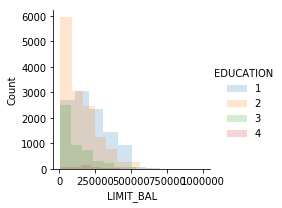

In [29]:
g = sns.FacetGrid(data, hue='EDUCATION')
g = g.map(plt.hist, 'LIMIT_BAL', alpha=0.2).set_axis_labels('LIMIT_BAL','Count')
g.add_legend()

More Education seems to result in more credit being extended, as we would expect. Indeed, we see from the summary statistics that having an education value of 1, meaning graduate school and having the most education, is associated with the highest mean of credit extended, as well as the highest variability.

*Eduation and Marriage*

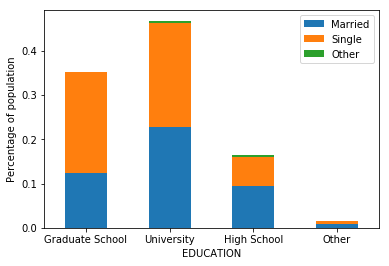

In [30]:
EM = data.groupby(['EDUCATION', 'MARRIAGE']).size().unstack(['MARRIAGE'])
EM = EM/len(data)
ax = EM.plot(kind='bar', stacked=True)
ax.set_xticklabels(['Graduate School', 'University', 'High School', 'Other'], rotation=0)
ax.legend(["Married", "Single", "Other"])
plt.ylabel("Percentage of population")
plt.show()

In [31]:
EM = data.groupby(['EDUCATION', 'MARRIAGE']).size().unstack(['MARRIAGE'])
EM['total'] = EM[1] + EM[2] + EM[3] 
EM = EM.loc[:, [1,2,3]].div(EM["total"], axis=0)
EM['Total'] = EM[1] + EM[2] + EM[3] 
EM.rename(columns={1:"Married", 2:"Single", 3:"Other"}, inplace=True)
EM.rename(index = {1:"Graduate School", 2:"University", 3:"High School", 4:"Other"}, inplace=True)
#gender['Percentage Default'] = pd.Series(["{0:.1f}%".format(val * 100) for val in gender['Percentage Default']], index=gender.index)
EM = (EM * 100).round(1)
for column in EM.columns:
    EM[column] = pd.Series(["{0:.1f}%".format(val) for val in EM[column]], index=EM.index)
EM

MARRIAGE,Married,Single,Other,Total
EDUCATION,,,,
Graduate School,35.2%,64.3%,0.5%,100.0%
University,48.8%,50.0%,1.2%,100.0%
High School,58.2%,38.8%,3.0%,100.0%
Other,50.0%,48.3%,1.7%,100.0%


As we can see from the chart and table, more education (a smaller value for Education) is associated with lower rates of marriage (column 1)

*Education and Age*

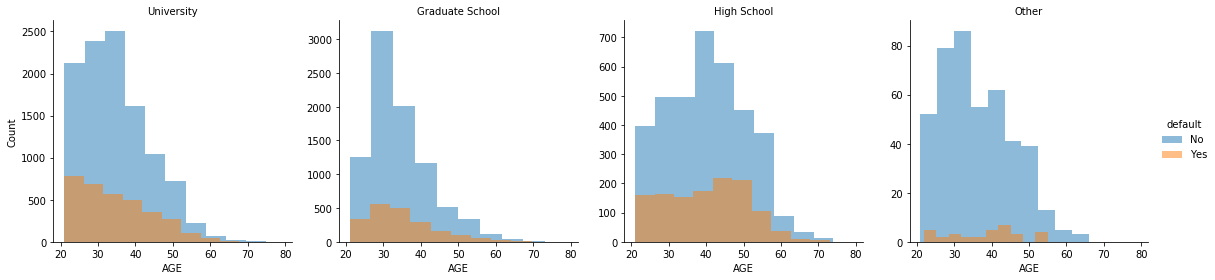

In [32]:
# Replace values for better labelling
replace = (data["EDUCATION"] == 1) 
data.loc[replace,'EDUCATION'] = "Graduate School"
replace = (data["EDUCATION"] == 2) 
data.loc[replace,'EDUCATION'] = "University"
replace = (data["EDUCATION"] == 3) 
data.loc[replace,'EDUCATION'] = "High School"
replace = (data["EDUCATION"] == 4) 
data.loc[replace,'EDUCATION'] = "Other"

# Replace numbers with strings for the purpose of better labelling on graphs
replace = (data["default"] == 0) 
data.loc[replace,'default'] = "No"
replace = (data["default"] == 1) 
data.loc[replace,'default'] = "Yes"


g = sns.FacetGrid(data, col='EDUCATION', hue='default',height=4, aspect=1, hue_order=["No", "Yes"], sharey=False)
g = g.map(plt.hist, 'AGE', alpha=0.5).set_axis_labels('AGE','Count').set_titles(("{col_name}"))
g.add_legend()
g.savefig('Education_and_Age')

# Return back for correlation purposes
replace = (data["EDUCATION"] == "Graduate School") 
data.loc[replace,'EDUCATION'] = 1
replace = (data["EDUCATION"] == "University") 
data.loc[replace,'EDUCATION'] = 2
replace = (data["EDUCATION"] == "High School") 
data.loc[replace,'EDUCATION'] = 3
replace = (data["EDUCATION"] == "Other") 
data.loc[replace,'EDUCATION'] = 4

replace = (data["default"] == "No") 
data.loc[replace,'default'] = 0
replace = (data["default"] == "Yes") 
data.loc[replace,'default'] = 1


In [33]:
var = data[['EDUCATION', 'AGE']].groupby('EDUCATION').agg({'mean', 'std'})
var.rename(index = {1:"Graduate School", 2:"University", 3:"High School", 4:"Other"}, inplace=True)
multi_tuples = [('AGE', 'mean'), ('AGE', 'std')]
multi_cols = pd.MultiIndex.from_tuples(multi_tuples)
df_ordered_multi_cols = pd.DataFrame(var, columns=multi_cols)
df_ordered_multi_cols.round(1)

AGE     
                mean  std
EDUCATION                
Graduate School 34.2  8.3
University      34.7  8.9
High School     40.3 10.4
Other           36.1  9.3

In [34]:
# Average Age By Education and Default Status
var = data[['EDUCATION', 'AGE', 'default']]
table = pd.pivot_table(var, values='AGE', index='EDUCATION', columns='default', aggfunc=np.mean)
table.rename(index = {1:"Graduate School", 2:"University", 3:"High School", 4:"Other"},columns={0:"No Default", 1:"Default"}, inplace=True)
table.round(1)

default,No Default,Default
EDUCATION,,
Graduate School,34.1,34.6
University,34.7,34.7
High School,40.3,40.2
Other,36.0,38.2


We can see a relationship here between less Education and being older. 

#### Marriage

MARRIAGE: Marital status (1=married, 2=single, 3=others)

count             30,000.0
mean    1.5572666666666666
std     0.5214047605458189
min                    1.0
25%                    1.0
50%                    2.0
75%                    2.0
max                    3.0
Name: MARRIAGE, dtype: float64


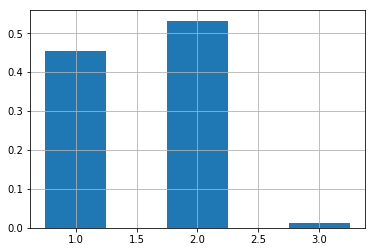

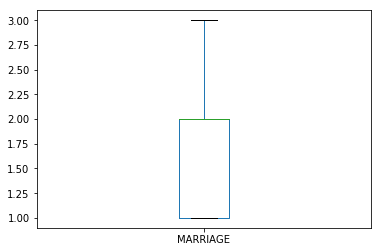

In [35]:
get_info('MARRIAGE', bins=[ 0.5,1.5,2.5,3.5], rwidth=0.5)

Slightly over half the records are single (2), about 45% are married (1) and the rest are other, coded as 3 (divorced, widowed, etc.)

In [36]:
check_significant_correlation('MARRIAGE')

AGE          -0.4120014367553708
EDUCATION    -0.1367969413360245
LIMIT_BAL   -0.11101219257995855
MARRIAGE                     1.0
Name: MARRIAGE, dtype: float64


We have already examined the correlation between Education and Marriage, so that won't be discussed.

* The negative correlation between Marriage and Age means that as Age increases, Marriage tends to decrease. In the context of our dataset, where a value of 1 for Marriage means 'married', a 2 means 'single', and a 3 means 'other', this makes sense. It it saying that as age increases, we are less likely to see values for 'single' and 'other', and more likely to see values for 'married'. That is, older people are more likely to be married. While it it true that age is likely to be negative correlated with singlehood, as is the case for our dataset, it should be correlated with other, such as 'divorced' or 'widowed'. However, since our dataset includes far more singles than others, it makes sense that the negative correlation with singlehood would dwarf the positive correlation with 'otherhood'.
* The other correlation to examine is the negative correlation between Marriage and the Amount of Given Credit ("LIMIT_BAL"). This correlation is somewhat at odds with our intuitions because we might think that being married translated into better management of finances and less credit taken on. However, it also makes sense that marriage comes with a lot of financial 'baggage' such as the cost of a wedding, house, car, children's education, etc. Thus, this correlation does make sense. 

What about the relationship between Marriage and Default?

In [37]:
marriage_and_default = relationship_with_default('MARRIAGE')
marriage_and_default.rename(index = {1:"Married", 2:"Single", 3:"Other"}, inplace=True)
marriage_and_default

default,No Default,Default,percentage default
MARRIAGE,,,
Married,10453,3206,23.5%
Single,12623,3341,20.9%
Other,288,89,23.6%


Married people more likely to default than singles, but the difference isn't that large. Also, 'Others' are more likely to default than marrieds, weakening the correlation.

*Marriage and Age*

In [38]:
var = data[['MARRIAGE', 'AGE']].groupby('MARRIAGE').agg({'mean', 'std'})
var.rename(index = {1:"Married", 2:"Single", 3:"Other"}, inplace=True)
var.round(1)

AGE     
         std mean
MARRIAGE         
Married  8.7 40.0
Single   7.6 31.5
Other    9.5 42.1

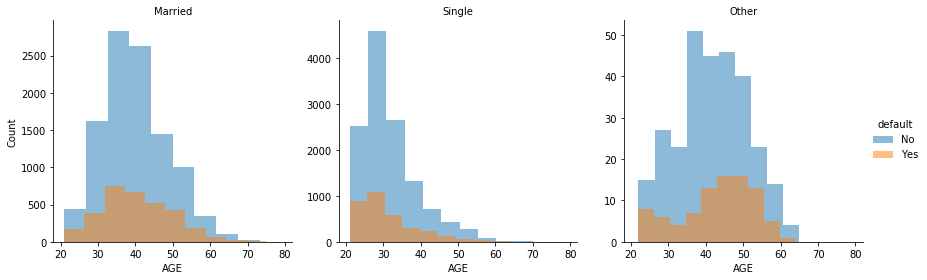

In [39]:
# Replace values for better labelling
replace = (data["MARRIAGE"] == 1) 
data.loc[replace,'MARRIAGE'] = "Married"
replace = (data["MARRIAGE"] == 2) 
data.loc[replace,'MARRIAGE'] = "Single"
replace = (data["MARRIAGE"] == 3) 
data.loc[replace,'MARRIAGE'] = "Other"


# Replace numbers with strings for the purpose of better labelling on graphs
replace = (data["default"] == 0) 
data.loc[replace,'default'] = "No"
replace = (data["default"] == 1) 
data.loc[replace,'default'] = "Yes"


g = sns.FacetGrid(data, col='MARRIAGE', hue='default',height=4, aspect=1, hue_order=["No", "Yes"], sharey=False)
g = g.map(plt.hist, 'AGE', alpha=0.5).set_axis_labels('AGE','Count').set_titles(("{col_name}"))
g.add_legend()
g.savefig('Marriage_and_Age')

# Return back for correlation purposes
replace = (data["MARRIAGE"] == "Married") 
data.loc[replace,'MARRIAGE'] = 1
replace = (data["MARRIAGE"] == "Single") 
data.loc[replace,'MARRIAGE'] = 2
replace = (data["MARRIAGE"] == "Other") 
data.loc[replace,'MARRIAGE'] = 3


replace = (data["default"] == "No") 
data.loc[replace,'default'] = 0
replace = (data["default"] == "Yes") 
data.loc[replace,'default'] = 1

The statistics and plot show that married people tend to be older than singles.

*Marriage and Credit (LIMIT_BAL)*

In [40]:
var = data[['MARRIAGE', 'LIMIT_BAL']].groupby('MARRIAGE').agg({'mean', 'std'})
var.rename(index = {1:"Married", 2:"Single", 3:"Other"}, inplace=True)
var.round(0)

LIMIT_BAL          
               std      mean
MARRIAGE                    
Married  133,382.0 182,201.0
Single   125,673.0 156,414.0
Other     95,573.0 103,077.0

Married people have more credit on average, and a greater variability of credit.

### Numerical Variables

#### Age

AGE: Age in years

count            30,000.0
mean              35.4855
std     9.217904068090183
min                  21.0
25%                  28.0
50%                  34.0
75%                  41.0
max                  79.0
Name: AGE, dtype: float64


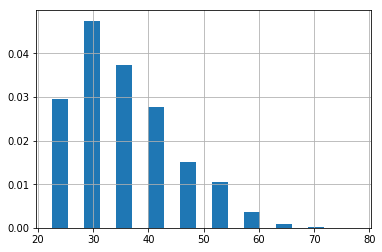

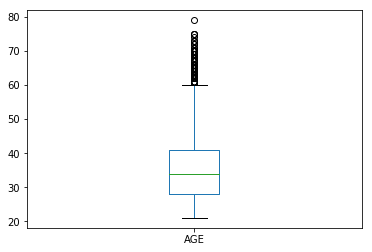

In [41]:
get_info('AGE')

Here we see a lot of outliers, that is, values that have an age greater than 60.5. We also note that 50% of the values lie between 28 and 41 and 75% of the values lie between 21 and 41.

In [42]:
check_significant_correlation('AGE')

MARRIAGE    -0.4120014367553708
LIMIT_BAL   0.14471279755733898
EDUCATION   0.18243429685768472
AGE                         1.0
Name: AGE, dtype: float64


We see significant correlations with Marriage and Education, which we have already explored. So we only need to examine the correlation with the amount of given credit ("LIMIT_BAL").

In [43]:
ALB = data[['AGE', 'LIMIT_BAL']].copy()
ALB['decade'] = ALB.AGE.apply(lambda x: str(x)[0] + '0')
var = ALB[['decade', 'LIMIT_BAL']].groupby('decade').agg({'mean', 'std'})
var.round(0)

LIMIT_BAL          
             std      mean
decade                    
20     105,741.0 124,209.0
30     131,460.0 197,001.0
40     136,587.0 180,786.0
50     141,509.0 163,909.0
60     142,455.0 185,382.0
70     123,502.0 218,800.0

We see that the average amount of credit taken on is lowest in the 20s bracket, and is far higher after that.

#### LIMIT_BAL

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

count              30,000.0
mean    167,484.32266666667
std     129,747.66156719506
min                10,000.0
25%                50,000.0
50%               140,000.0
75%               240,000.0
max             1,000,000.0
Name: LIMIT_BAL, dtype: float64


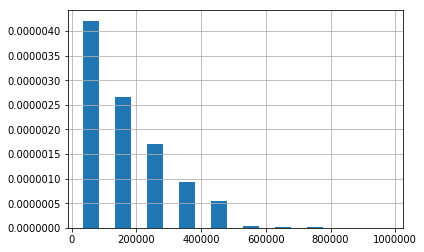

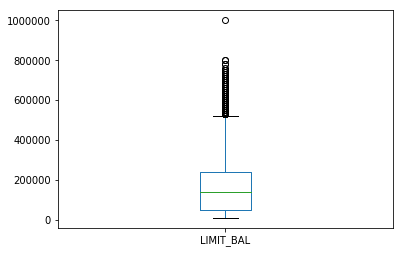

In [44]:
get_info('LIMIT_BAL')

We see a lot of outliers from the boxplot and a broad range, which makes sense. Most values should be clustered at a lower end of the spectrum, with a few points being outliers representing high amounts of credit owed (which should be outliers since most people should not have very high amounts of credit owed). We also see that the median is about 27,000 less than the mean, showing the influence of these outlier points on it. Finally, we can see the that this distribution has a high degree of variability associated with it, represented by the high standard deviation.

In [45]:
check_significant_correlation('LIMIT_BAL')

EDUCATION   -0.23108753519666203
PAY_2         -0.197135865439187
PAY_3       -0.19132332903738378
PAY_4       -0.18062940872051259
PAY_1       -0.17074460499211994
PAY_5       -0.17004461548219083
PAY_6        -0.1678202893854305
default      -0.1535198763934634
MARRIAGE    -0.11101219257995855
AGE          0.14471279755733898
PAY_AMT2      0.1784079536837089
PAY_AMT1     0.19523591523218456
PAY_AMT4     0.20324241022461373
PAY_AMT3     0.21016674772340774
PAY_AMT5     0.21720243239551573
PAY_AMT6      0.2195953686044145
BILL_AMT2    0.27831436399777376
BILL_AMT3    0.28323578358169615
BILL_AMT1     0.2854298649650024
BILL_AMT6     0.2903889506479491
BILL_AMT4    0.29398762371600184
BILL_AMT5     0.2955623376582501
LIMIT_BAL                    1.0
Name: LIMIT_BAL, dtype: float64


Wow! We see that LIMIT_BAL - the amount of given credit - is notably correlated (using a 0.1 threshould value) with everything except for Sex. Upon thinking a little, we should realize that this is not too surprising. If our goal is to predict default, then a variable that tells us the amount of given credit should be very important and thus correlated with many of the other variables which should also do this.

We can put aside the correlations with Education, Marriage, and Age since those have been discussed above. So let us examine the correlations between LIMIT_BAL and the PAY_X variables, the BILL_AMTX variables, the PAY_AMTX variables, and the default variable:

* Let's take the PAY_X variables as a group since they all represent repayment status, just at different times. Would we expect having more credit to be associated with a better or worse repayment status? I would think a worse one. I would think that having more credit makes it more likely that someone has delayed his or her payments. Therefore, it is surprising that this is not the case, and in fact more credit is associated with a better repayment status. This makes sense when thinking about it. Credit companies are more likely to extend lots of credit to customers they believe can pay back. So this is ultimately a noteable result.
* Next, let's consider the relation between credit and the amount of our bill statement. Should more credit be associated with higher bill statements? Obviously yes. Credit is being taken for the purpose of spending. Here our intuitions serve us well as we see correlations of between 0.25 and 0.3 for LIMIT_BAL and the BILL_AMTX variables.
* Next, we look at the relation between credit and previous payment. Should more credit mean that our previous payments were high? In light of looking at bill amount, I would think so. I would think more credit means I have done a good job of paying off my last payment. And indeed, we see positive correlations here, showing that to be the case.
* Finally, we consider the correlation between credit and default. Should more credit be associated with more default? On one hand, it is easier to default with more credit owed. On the other hand, being extended that credit in the first place implies an ability to pay it off. What we see, ultimately, is that the second line of reasoning is correct. Credit is negatively associated with defaulting, likely because those with higher credit have greater ability to avoid default.

#### PAY_X

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)  
PAY_2: Repayment status in August, 2005 (scale same as above)  
PAY_3: Repayment status in July, 2005 (scale same as above)  
PAY_4: Repayment status in June, 2005 (scale same as above)  
PAY_5: Repayment status in May, 2005 (scale same as above)  
PAY_6: Repayment status in April, 2005 (scale same as above)  

Before we proceed further, it is helpful to define a function we will use a few times:

In [46]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=n_bins, ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

##### Histograms Next to Each Other

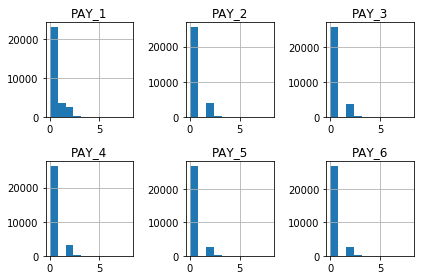

In [47]:
late = data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [48]:
def draw_boxplots(df, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].plot(kind='box')
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

##### Boxplots Next to Each Other

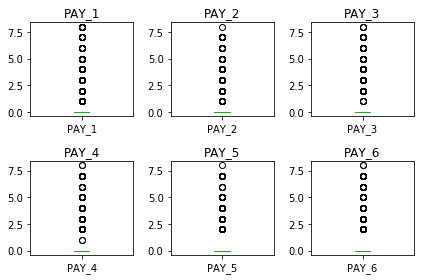

In [49]:
late = data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_boxplots(late, late.columns, 2, 3)

Larger Histograms and Boxplots Together with Summary Statistics

We see that the mean is increasing as we move forward in time, meaning that repayment status is getting worse. This is somewhat surprising as there is no particular reason why this has to be happening. One reason could be that most people's credit gets worse from month to month until one month when they decide to pay off most or all of their debts in one go, before starting the debt accumulation process over.
The summary statistics, histograms, and boxplots don't tell us much more, other than that any payment delay is an outlier.

In [50]:
c = data.corr()[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
c[abs(c) > 0.1]

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
LIMIT_BAL,-0.17074460499211994,-0.197135865439187,-0.19132332903738378,-0.18062940872051259,-0.17004461548219083,-0.1678202893854305
SEX,nan,nan,nan,nan,nan,nan
EDUCATION,nan,nan,nan,nan,nan,nan
MARRIAGE,nan,nan,nan,nan,nan,nan
AGE,nan,nan,nan,nan,nan,nan
PAY_1,1.0,0.6983894324845464,0.5169696606571565,0.46022436789029314,0.4244733990755022,0.3738045571750474
PAY_2,0.6983894324845464,1.0,0.6635291569167138,0.5127728528787494,0.46271748173224514,0.4070860651853456
PAY_3,0.5169696606571565,0.6635291569167138,1.0,0.678930991610762,0.5514297602967073,0.4928266325951435
PAY_4,0.46022436789029314,0.5127728528787494,0.678930991610762,1.0,0.7454190693686263,0.6028754765883724
PAY_5,0.4244733990755022,0.46271748173224514,0.5514297602967073,0.7454190693686263,1.0,0.7403572783092739


We see that all the variables that are correlated with one value of PAY_X are also correlated with the others. Thus, we can examine them together.

So what are some things we notice?
* They repayment status variables are highly correlated with each other. This makes sense. If I am behind on my payments one month, I am very likely to be behind on them the next month. Moreover, we see that the correlation between repayment status each month increases as we get closer to that month. That is month X-1 is more correlated to month X, than is month X-2, which in turn is more correlated than X-3, and so on.
* We also notice a strong correlation between repayment status and defaulting. This also makes sense. The more behind we are on making payments, the more likely we are to defauly. Additionally, we notice that the correlation increases with time, which also makes sense. Being behind on your payments in September is more correlated with defaulting after September, than being behind on your payments in April.

#### BILL_AMTX

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)  
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)  
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)  
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)  
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)  
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)  

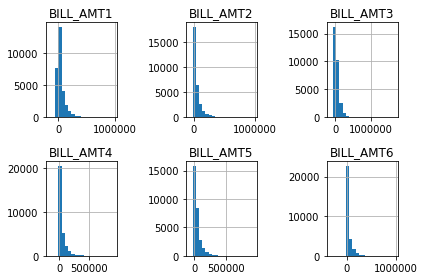

In [51]:
# Histograms at a glance
bills = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

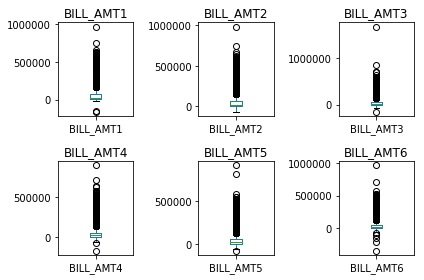

In [52]:
# Boxplots at a glance
draw_boxplots(bills, bills.columns, 2, 3)

We notice from the summary statistics that the mean amount of the bill statments are increasing with time. Also the standard deviation of the amount of bill statements is also increasing. The quantiles are also increasing.

In [53]:
c = data.corr()[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
c[abs(c) > 0.1]


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
LIMIT_BAL,0.2854298649650024,0.27831436399777376,0.28323578358169615,0.29398762371600184,0.2955623376582501,0.2903889506479491
SEX,nan,nan,nan,nan,nan,nan
EDUCATION,nan,nan,nan,nan,nan,nan
MARRIAGE,nan,nan,nan,nan,nan,nan
AGE,nan,nan,nan,nan,nan,nan
PAY_1,nan,nan,nan,nan,nan,nan
PAY_2,nan,nan,nan,nan,nan,nan
PAY_3,nan,nan,nan,nan,nan,nan
PAY_4,nan,nan,nan,nan,nan,nan
PAY_5,nan,nan,nan,nan,nan,nan


We observe that, with the exception of the correlation between BILL_AMT1 and PAY_AMT2 (the correlation between the bill statement in September and the amount of the previous payment in August), all BILL_AMTs have the same noteable correlations at the 0.1 threshold level. We need only examine the correlations between BILL_AMTs and between BILL_AMTs and PAY_AMTs since all other correlations have been previously considered.

* We begin with correlations with BILL_AMTs. We notice their high correlations with one another and observe that their correlations increase with proximity in time, the same way theat the correlations between repayment status worked. These mean that high bill statements month to month are correlated, as we would expect.
* We also note that bill statement is correlated with previous payments. That is a high bill amount in month X is associated with a high previous payment in month X, as well as in the preceding months and forthcoming months. We do notice a special relationship among the variables whereby BILL_AMTX is especially correlated with PAY_AMTX+1. This means that the amount of a bill statement in month X is correlated with the amount of the previous payment in the next month. Which is as it should be. 

#### PAY_AMTX

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)  
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)  
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)  
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)  
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)  
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)  

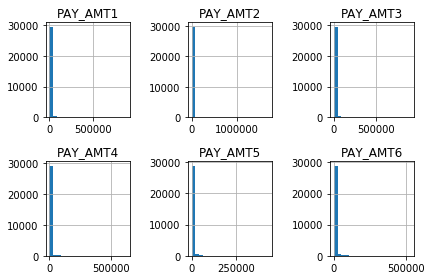

In [54]:
prev = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(prev, prev.columns, 2, 3, 20)

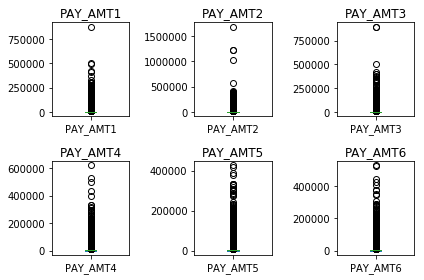

In [55]:
draw_boxplots(prev, prev.columns, 2, 3)

The amount of previous payments is very low in relation to the outliers that exist. Other than that, not many patterns to observe.

These are examples of high-paying, wealthy customers.

In [56]:
c = data.corr()[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
c[abs(c) > 0.1]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,0.19523591523218456,0.1784079536837089,0.21016674772340774,0.20324241022461373,0.21720243239551573,0.2195953686044145
SEX,nan,nan,nan,nan,nan,nan
EDUCATION,nan,nan,nan,nan,nan,nan
MARRIAGE,nan,nan,nan,nan,nan,nan
AGE,nan,nan,nan,nan,nan,nan
PAY_1,nan,nan,nan,nan,nan,nan
PAY_2,nan,nan,nan,nan,nan,nan
PAY_3,nan,nan,nan,nan,nan,nan
PAY_4,nan,nan,nan,nan,nan,nan
PAY_5,nan,nan,nan,nan,nan,nan


We need only focus on the correlations between the amounts of previous payments due to covering the other correlations above. What we find is that they are unsurprisingly correlated, with the magnitude of correlation weakly related to temporal distance. That is, the amount of previous payment in one month is generally somewhat closer to months closer to it than farther from it.

#### default

default: Default payment (1=yes, 0=no)

count             30,000.0
mean                0.2212
std     0.4150618056909671
min                    0.0
25%                    0.0
50%                    0.0
75%                    0.0
max                    1.0
Name: default, dtype: float64


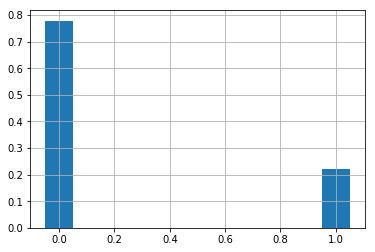

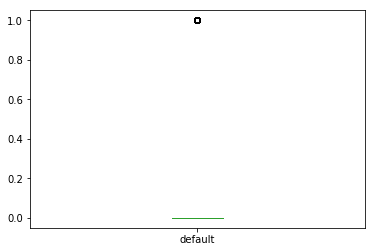

In [57]:
get_info('default', bins=[-0.5, 0.5, 1.5], rwidth=0.1 )

In [58]:
data['default'].count() - data['default'].sum()

23364

We observe that most values (23,364) are non-defaults, so about 22.12% of our values are default ones (this is also the mean). 

In [59]:
check_significant_correlation('default')

LIMIT_BAL   -0.1535198763934634
PAY_6       0.24443727769509294
PAY_5        0.2608502900490302
PAY_4        0.2690554462141356
PAY_3        0.2869993895248475
PAY_2        0.3270930793674196
PAY_1           0.3960191707577
default                     1.0
Name: default, dtype: float64


Let us here review the factors most correlated with defaulting or not defaulting.
* We see that a higher amount of given credit is associated with a reduced chance of defaulting, likely because credit is generally extended to those who can pay it back.
* We also see that poor repayment status is correlated with defaulting, with poor status in months closer to October being more associated with default, as we would expect.

### Additional Analysis

In [60]:
replace = ((data.PAY_AMT1 > data.BILL_AMT2) & (data.PAY_1 > 0) & (data.PAY_2 == 0))
data[replace] [['BILL_AMT2', 'PAY_2', 'PAY_AMT2', 'BILL_AMT1', 'PAY_1', 'PAY_AMT1', 'LIMIT_BAL', 'default']].head(15)

,BILL_AMT2,PAY_2,PAY_AMT2,BILL_AMT1,PAY_1,PAY_AMT1,LIMIT_BAL,default
ID,,,,,,,,
27,-425.0,0,"1,000.0",-109.0,1,0.0,"60,000.0",1
69,"-9,850.0",0,0.0,-190.0,1,0.0,"130,000.0",0
110,-103.0,0,0.0,-103.0,1,0.0,"360,000.0",0
150,"-1,100.0",0,"22,500.0","-1,100.0",1,0.0,"260,000.0",0
174,-709.0,0,0.0,-709.0,1,0.0,"50,000.0",1
187,"57,077.0",0,"5,295.0","2,616.0",1,"57,087.0","360,000.0",0
217,-946.0,0,0.0,-946.0,1,0.0,"240,000.0",1
277,"2,715.0",0,0.0,171.0,2,"2,728.0","460,000.0",1
320,-2.0,0,0.0,-2.0,1,0.0,"180,000.0",0


These records do not seem to make sense. They represent values who had a repayment status of 0 in August (PAY_2 == 0), paid more in August than their bill in August was for (data.PAY_AMT1 > data.BILL_AMT2), and now have a status of being behind on payments (PAY_1 > 0). Some even default. This should not be possible.

One approach is to convert these variables to a binary variable representing being late on payments or not. 